In [25]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os

In [2]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_2')
dir = os.getcwd()
dir

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_2'

In [3]:
train_data = os.path.join('train')
test_data = os.path.join('test')

In [4]:
files = os.listdir(train_data)
print(files[:3])

['angry', 'disgusted', 'fearful']


### CNN model for training 

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [6]:
#  mod = tf.keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     alpha=1.0,
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax")

## Tranfer Learning

In [7]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [8]:
ip=mod.layers[0].input
op=mod.layers[-2].output


In [9]:
op

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [10]:
final_output=tf.keras.layers.Flatten()(op)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(128)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_3')>

In [11]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
# model = tf.keras.models.Sequential([
    
#     op,
#     tf.keras.layers.Dense(1024 , activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512 , activation='relu'),
#     tf.keras.layers.Dense(7 , activation='softmax')
    
# ])

In [14]:
# model.summary()

In [15]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

# Augmentation


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [17]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=1000,epochs=50,validation_data=test_data_gen, verbose=2 ,batch_size =10 )

Epoch 1/50
1000/1000 - 242s - loss: 1.7821 - accuracy: 0.2733 - val_loss: 1.5079 - val_accuracy: 0.4331
Epoch 2/50
1000/1000 - 229s - loss: 1.5024 - accuracy: 0.4257 - val_loss: 1.3256 - val_accuracy: 0.4894
Epoch 3/50
1000/1000 - 225s - loss: 1.3841 - accuracy: 0.4778 - val_loss: 1.2831 - val_accuracy: 0.5300
Epoch 4/50
1000/1000 - 225s - loss: 1.3114 - accuracy: 0.5135 - val_loss: 1.1622 - val_accuracy: 0.5711
Epoch 5/50
1000/1000 - 225s - loss: 1.2454 - accuracy: 0.5437 - val_loss: 1.1839 - val_accuracy: 0.5649
Epoch 6/50
1000/1000 - 225s - loss: 1.2371 - accuracy: 0.5530 - val_loss: 1.1178 - val_accuracy: 0.5892
Epoch 7/50
1000/1000 - 225s - loss: 1.1896 - accuracy: 0.5666 - val_loss: 1.1330 - val_accuracy: 0.5843
Epoch 8/50
1000/1000 - 225s - loss: 1.1453 - accuracy: 0.5851 - val_loss: 1.0345 - val_accuracy: 0.6167
Epoch 9/50
1000/1000 - 225s - loss: 1.1367 - accuracy: 0.5884 - val_loss: 1.0273 - val_accuracy: 0.6230
Epoch 10/50
1000/1000 - 225s - loss: 1.1153 - accuracy: 0.5958 -

In [20]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.2732999920845032, 0.42574256658554077, 0.47780001163482666, 0.513451337814331, 0.5436999797821045, 0.5529999732971191, 0.5666000247001648, 0.585099995136261, 0.5884000062942505, 0.59579998254776, 0.6088609099388123, 0.61086106300354, 0.6128000020980835, 0.6100999712944031, 0.61080002784729, 0.6263999938964844, 0.6259999871253967, 0.6306630373001099, 0.6384638547897339, 0.635200023651123, 0.6442644000053406, 0.6481648087501526, 0.6464999914169312, 0.6521999835968018, 0.6563000082969666, 0.6601999998092651, 0.6606000065803528, 0.6723999977111816, 0.664666473865509, 0.6689000129699707, 0.6819000244140625, 0.6791999936103821, 0.6782000064849854, 0.6839684247970581, 0.682200014591217, 0.6968696713447571, 0.6890000104904175, 0.6941999793052673, 0.6910691261291504, 0.6959999799728394, 0.7038000226020813, 0.6976000070571899, 0.7071707248687744, 0.718500018119812, 0.7074999809265137, 0.7215721607208252, 0.7287728786468506, 0.7282728552818298, 0.7202000021934509, 0.7266726493835449]
[0.433129

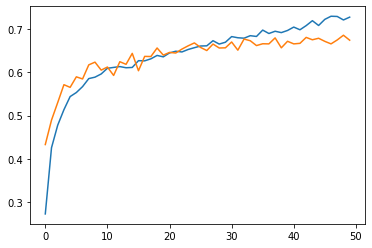

In [21]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

In [2]:
# best fit till now
# epoch_step = 800
# RMS alpha = 0.001
# 1024 , 512 , 128 , 0.3drop
#71%